<a href="https://colab.research.google.com/github/AvinashKushwah/cs6910_assignment1/blob/main/DL_Question2__trial3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np


# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(y_train)
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               

[9 0 0 ... 3 0 5]


In [ ]:
x_trainFlat = x_train.reshape(len(x_train),784).astype('float32')/255
print(x_trainFlat.shape)
x_testFlat = x_test.reshape(len(x_test),784).astype('float32')/255
print(x_trainFlat.shape[0])



(60000, 784)
60000


In [ ]:
# Activation Function

def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

def sigmoid_diff(x):
  return (1 - sigmoid(x)) * sigmoid(x)

# def softmax(x):
#   # x -= np.max(x,axis =1,keepdims=True)  #subtracting to avoid numerical instablity
#   # temp = np.exp(x)
#   # softmax_result = temp/np.sum(temp,axis=1,keepdims=True)
#   # return softmax_result
#   x = x.reshape((1,10))
#   exp_x = np.exp(x)
#   return exp_x / np.sum(exp_x, axis=1, keepdims=True)




(60000,)
(28, 28)
enter number of Hidden layers:2


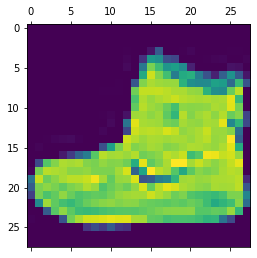

In [ ]:
# Normalize the image pixel intesity within a range of 0-1
# x_train = x_train/255
# x_test = x_test /255
print(y_train.shape)
print(x_train[0].shape)
plt.matshow(x_train[0])
layers = int(input("enter number of Hidden layers:"))
layers = int(layers)

In [ ]:
# layers = input("enter number of Hidden layers:")
# layers = int(layers)
# numberOfNeurons =[]               # number of neurons at each Hidden Layer
# W = []                            #store the Weight matrix at each layer
# b = []                            #store the bias vector at each layer


# for i in range(layers):                       
#   randomNumber = np.random.randint(4,10)
#   numberOfNeurons.append(randomNumber)
#   if( i== 0):
#     w_temp =np.random.rand(randomNumber,784)
#     b_temp = np.random.rand(randomNumber)
#     W.append(w_temp)
#     b.append(b_temp)
#   else:
#     w_temp = np.random.rand(numberOfNeurons[i],numberOfNeurons[i-1])
#     b_temp = np.random.rand(numberOfNeurons[i])
#     W.append(w_temp);
#     b.append(b_temp)

# output_w = np.random.rand(10,numberOfNeurons[layers-1])
# output_b = np.random.rand(10)
# W.append(output_w)
# b.append(output_b)

# #print(len(W))
# #print(len(b))
# #print(W[0].shape)
# # def randomIntialization(dimx,dimy):
# #   W_temp = np.random.randint(10,size=(dimx,dimy)) # assigning random number between 0-9
# #   b_temp = np.random.randint(10,size=(dimx))
# #   return W_temp, b_temp



# def feedForward(input_data):
    
#    Y= sigmoid(np.dot(W[0],input_data) + b[0])
#    for i in range(1,layers):
#       Y = sigmoid(np.dot(W[i],Y)) + b[i]
  
#    output = sigmoid(np.dot(W[layers],Y)) + b[layers]
#    return output




# output = feedForward(x_trainFlat[0])
# outputSoftmax = softmax(output)
# #print(output.shape)
# print(outputSoftmax)



In [ ]:
# def softmax1(x):
#   x -= np.max(x,axis =1,keepdims=True)  #subtracting to avoid numerical instablity
#   temp = np.exp(x)
#   softmax_result = temp/np.sum(temp,axis=1,keepdims=True)
#   return softmax_result
 # x = x.reshape((1,10))
  # exp_x = np.exp(x)
  # return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def softmax1(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
  
def ReLU(x):
    return np.maximum(x, 0)

def ReLU_deriv(x):
    return x > 0

def Initalize_Wb():
  #layers = int(input("enter number of Hidden layers:"))
  #layers = int(layers)
  numberOfNeurons =[]               # number of neurons at each Hidden Layer
  W = []                            #store the Weight matrix at each layer
  b = []                            #store the bias vector at each layer
  for i in range(layers):                       
    randomNumber = np.random.randint(64,256)
    numberOfNeurons.append(randomNumber)
    if( i== 0):
      w_temp =np.random.rand(randomNumber,784) - 0.5
      b_temp = np.random.rand(randomNumber,1) - 0.5
      W.append(w_temp)
      b.append(b_temp)
    else:
      w_temp = np.random.rand(numberOfNeurons[i],numberOfNeurons[i-1]) - 0.5
      b_temp = np.random.rand(numberOfNeurons[i],1) - 0.5
      W.append(w_temp);
      b.append(b_temp)

  print(numberOfNeurons)
  output_w = np.random.rand(10,numberOfNeurons[layers-1]) - 0.5
  output_b = np.random.rand(10,1) - 0.5
  W.append(output_w)
  b.append(output_b)
  # print(len(W))
  # print(len(b))
  # print(W[0].shape)
  # print(W[1].shape)
  # print(W[2].shape)
  # print(b[0].shape)
  # print(b[1].shape)
  # print(b[2].shape)

  return W,b


# def randomIntialization(dimx,dimy):
#   W_temp = np.random.randint(10,size=(dimx,dimy)) # assigning random number between 0-9
#   b_temp = np.random.randint(10,size=(dimx))
#   return W_temp, b_temp

def feedForward(input_data,W,b):
  
   output =[]
   temp =[]
   A =[]
  #  print("hello",b[0].shape)
  #  print(b[0].reshape(-1,1).shape)
   Y =np.dot(W[0],input_data) + b[0]
   temp.append(Y)
   Y= ReLU(Y)
   A.append(Y)
   for i in range(1,layers):
      Y =np.dot(W[i],Y) + b[i]
      temp.append(Y)
      Y=ReLU(Y)
      A.append(Y)
   temp2=np.dot(W[layers],Y) + b[layers]
   temp.append(temp2)
   output=(softmax1(ReLU(temp2)))
   #print("softmaxt",output[:,1])
   return output,temp,A



#print(x_trainFlat.shape)
#Y_predicted,Intermediate_Activation,A= feedForward(x_trainFlat.T)
#Y_predicted = np.array(Y_predicted)
#Intermediate_Activation = np.array(Intermediate_Activation)
#print(Y_predicted[0][1])
# print(Y_predicted.shape)
# print(Intermediate_Activation[0].shape)
# print(Intermediate_Activation[1].shape)
# print(Intermediate_Activation[2].shape)




In [ ]:
def find_Actuall_Y():
  X,Y = x_trainFlat.shape
  # print(X)
  Y_actual=[]
  for i in range(X):
    tempX =x_trainFlat[i]
    tempY = y_train[i]
    vector = np.zeros(10)             # creating a vector of size 10 and assigning '1' to the correct index of trainFlat[i]
    vector[tempY] =1
    Y_actual.append(vector)
    # #outputY=softmax(feedForward(x_trainFlat[i]))
    # Y_predicted.append(outputY)
    # loss = -np.mean(np.sum(Y_actual * np.log(Y_predicted),axis =1))          #crossEntropy loss Caluclation
  return Y_actual


Y_actual = find_Actuall_Y()
Y_actual = np.array(Y_actual)
Y_actual = Y_actual.T
print(Y_actual.shape)

# def errorCalculation(Y_actual,Y_predicted):
#   Y_predicted = np.clip(Y_predicted, 1e-7, 1 - 1e-7) # you may want to clip them to avoid log 0. avoiding numercial instablity
#   temp = Y_actual.shape[0]
#   loss = -1/temp * np.sum(np.multiply(Y_actual, np.log(Y_predicted)) + np.multiply((1 - Y_actual), np.log(1 - Y_predicted)))


# errorLoss = errorCalculation(Y_actual, Y_predicted)
# print(errorLoss)

# Assuming Y_predicted and Y_actual are 10x60000 arrays
def cross_entropy_loss(Y_actual, Y_predicted):
    # Clip predicted values to avoid log(0) numerical instability
    Y_predicted = np.clip(Y_predicted, 1e-7, 1 - 1e-7)
    
    # Compute cross-entropy loss
    N = Y_actual.shape[1] # number of samples
    loss = -1/N * np.sum(Y_actual * np.log(Y_predicted))
    return loss

# error = cross_entropy_loss(Y_actual, Y_predicted)
# print(error)




(10, 60000)


In [ ]:
#Backpropogation Function

def backpropagation(X, Y_actual, Y_predicted, Intermediate_Activation,A,W,b):
    dW = [None] * (len(W)) # gradient of weight matrix at each layer
    db = [None] * (len(b)) # gradient of bias vector at each layer
    
    # Compute derivative of loss with respect to output
    dL_dZ = Y_predicted - Y_actual
    
    # Compute gradients for output layer
   #dW[-1] = 1/X.shape[0] * np.dot(dL_dZ, Intermediate_Activation[-1].T)
    dW[-1] = 1/X.shape[0] * np.dot(dL_dZ, A[-1].T)
    db[-1] = 1/X.shape[0] * np.sum(dL_dZ, axis=1, keepdims=True)
   # print(dL_dZ.shape)
    #print(db[-1].shape)
    
    # Backpropagate gradients through hidden layers
    for l in reversed(range(1, len(W)-1)):
        dL_dY = np.dot(W[l+1].T, dL_dZ)
        # print(dL_dY.shape)
        # print(Intermediate_Activation[l].shape)
        # zy= sigmoid_diff(Intermediate_Activation[l-1])
        # print(zy.shape)
        dL_dZ = dL_dY * ReLU_deriv(Intermediate_Activation[l])
        dW[l] = 1/X.shape[0] * np.dot(dL_dZ, Intermediate_Activation[l-1].T)
        db[l] = 1/X.shape[0] * np.sum(dL_dZ, axis=1, keepdims=True)

    
    # Compute gradients for input layer
    dL_dY = np.dot(W[1].T, dL_dZ)
    dL_dZ = dL_dY * ReLU_deriv(Intermediate_Activation[0])
    dW[0] = 1/X.shape[0] * np.dot(dL_dZ, X)
    db[0] = 1/X.shape[0] * np.sum(dL_dZ, axis=1, keepdims=True)
    # print("insside update",len(db))
    # print(db[0].shape)
    # print(db[1].shape)
    # print(db[2].shape)
    return dW, db

# dW,db = backpropagation(x_trainFlat,Y_actual,Y_predicted,Intermediate_Activation)
# print(dW[0].shape,db[0].shape)
# print(dW[1].shape,db[1].shape)
# print(dW[2].shape,db[2].shape)

In [ ]:
def Update(W,b,dW,db,learningRate):

  for i in range (len(W)):
    W[i] = W[i] -learningRate*dW[i]
   # print("before update",b[i].shape,db[i].shape)
    b[i] = b[i] -learningRate* db[i]
    #print("after update",b[i].shape, W[i].shape)
  
  return W,b


#W,b=Update(W,b,dW,db,0.1)


In [ ]:
 
#  get_prediction(Y_predicted,y_train):



# def getAccuracy()



# def gradient_descent(x_trainFlat,y_train,Y_actual,iteration,learning_rate,W,b):

#   for i in range(iteration):
#     Y_predicted,Intermediate_Activation,A= feedForward(x_trainFlat.T)
#     Y_predicted = np.array(Y_predicted)
#     dW,db = backpropagation(x_trainFlat,Y_actual,Y_predicted,Intermediate_Activation)
#     W,b = Update(W,b,dW,db,learning_rate)
#     if(i%50 ==0):
#       print("iteration:",i)
#       print("Accuracy:",get_Accuracy(get_prediction(Y_predicted),y_train))
    
#     return W,b



# W,b = gradient_descent(x_trainFlat,Y_actual,1000,0.1,W,b)


# def getAccuracy(y_predicted, y_actual):
#     """
#     Compute the accuracy of the predicted labels y_predicted compared to the actual labels y_actual.
#     """
#     y_pred_labels = np.argmax(y_predicted, axis=0)
#     print("Ypredicted",y_pred_labels.shape)
#     print("y_actual",Y_actual[:,1])
#     Intersection = y_pred_labels * Y_actual
#     matches = np.all(Intersection == 1, axis=0)
#     accuracy = np.mean(matches)
    
#     return accuracy

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# def get_prediction(Y_predicted):
#     """
#     Convert the predicted output of the network Y_predicted to a one-hot encoded array of labels.
#     """
#     y_pred_labels = np.argmax(Y_predicted, axis=0)
#     n_labels = Y_predicted.shape[0]
#     n_examples = Y_predicted.shape[1]
#     y_pred = np.zeros((n_labels, n_examples))
#     y_pred[y_pred_labels, np.arange(n_examples)] = 1
#   return y_pred

# def gradient_descent(x_trainFlat,Y_actual,y_train,iteration,learning_rate):
#     W,b = Initalize_Wb()
#     print(len(W),len(b))
#     for i in range(iteration):
#         Y_predicted, Intermediate_Activation, A = feedForward(x_trainFlat.T,W,b)
#         dW, db = backpropagation(x_trainFlat,Y_actual,Y_predicted,Intermediate_Activation,A,W,b)
#         # print("x",len(b),b[0].shape,b[1].shape,b[2].shape)
#         W,b = Update(W,b,dW,db,learning_rate)
#         #print("len of b",len(b))
#         if i % 10 == 0:
#             print("iteration:", i)
#            # y_pred = get_prediction(Y_predicted)
#             #print("Ypredicted",Y_predicted[:,1])
#             #print("y_actual",Y_actual[:,1])
#             #acuracy = getAccuracy(Y_predicted, Y_actual)
#             predictions = get_predictions(Y_predicted)
#             print("Accuracy:", get_accuracy(predictions,y_train)*100)
#     return W,b
     

# W,b = gradient_descent(x_trainFlat, Y_actual,y_train,1000, 0.1)

In [ ]:
# def stochastic_gradient_descent(x_trainFlat, Y_actual, y_train, batch_size, epochs, learning_rate):
#     W, b = Initalize_Wb()
#     print(len(W), len(b))
#     m = x_trainFlat.shape[1]
#     print(m)
#     for epoch in range(epochs):
#         epoch_loss = 0
#         for i in range(0, m, batch_size):
#             x_batch = x_trainFlat[:, i:i+batch_size]
#             y_batch = Y_actual[:, i:i+batch_size]
#             Y_predicted, Intermediate_Activation, A = feedForward(x_batch.T, W, b)
#             dW, db = backpropagation(x_batch, y_batch, Y_predicted, Intermediate_Activation, A, W, b)
#             W, b = Update(W, b, dW, db, learning_rate)
#             epoch_loss += np.sum((Y_predicted - y_batch) ** 2)
#         epoch_loss /= m
#         if epoch % 10 == 0:
#             print(f"Epoch {epoch}, Loss {epoch_loss}")
#             predictions = get_predictions(Y_predicted)
#             print("Accuracy:", get_accuracy(predictions,y_train)*100)
#     return W, b

# W, b = stochastic_gradient_descent(x_trainFlat, Y_actual, y_train, batch_size=64, epochs=100, learning_rate=0.1)


[104, 181]
3 3
784


ValueError: ignored

In [ ]:


def stochastic_gradient_descent(x_trainFlat, Y_actual, y_train, iteration, learning_rate, batch_size):
    W, b = Initalize_Wb()
    for i in range(iteration):
        # Randomly shuffle the training data and split it into batches
        idx = np.random.permutation(len(x_trainFlat))
        x_trainFlat_shuffled = x_trainFlat[idx]
        Y_actual_shuffled = Y_actual[:, idx]
        y_train_shuffled = np.array(y_train)[idx]
        for j in range(0, len(x_trainFlat), batch_size):
            # Select a batch of training examples
            x_batch = x_trainFlat_shuffled[j:j+batch_size]
            Y_actual_batch = Y_actual_shuffled[:, j:j+batch_size]
            y_train_batch = y_train_shuffled[j:j+batch_size]
            # Compute the forward pass and backpropagation for the batch
            Y_predicted_batch, Intermediate_Activation_batch, A_batch = feedForward(x_batch.T, W, b)
            dW_batch, db_batch = backpropagation(x_batch, Y_actual_batch, Y_predicted_batch, Intermediate_Activation_batch, A_batch, W, b)
            # Update the parameters using the batch gradient
            W, b = Update(W, b, dW_batch, db_batch, learning_rate)
        if i % 10 == 0:
            # Compute the accuracy on the entire training set
            Y_predicted, _, _ = feedForward(x_trainFlat.T, W, b)
            predictions = get_predictions(Y_predicted)
            accuracy = get_accuracy(predictions, y_train) * 100
            print(f"Iteration {i}: accuracy = {accuracy:.2f}%")
    return W, b


W,b = stochastic_gradient_descent(x_trainFlat,Y_actual,y_train,100,0.1,64)

[157, 90]
[9 0 2 ... 3 0 5] [9 0 0 ... 3 0 5]
Iteration 0: accuracy = 77.25%
[9 0 0 ... 3 0 5] [9 0 0 ... 3 0 5]
Iteration 10: accuracy = 87.73%
[9 0 0 ... 3 0 5] [9 0 0 ... 3 0 5]
Iteration 20: accuracy = 90.21%
[9 0 0 ... 3 0 5] [9 0 0 ... 3 0 5]
Iteration 30: accuracy = 91.97%
[9 0 3 ... 3 0 5] [9 0 0 ... 3 0 5]
Iteration 40: accuracy = 92.94%
[9 0 0 ... 3 0 5] [9 0 0 ... 3 0 5]
Iteration 50: accuracy = 92.98%
[9 0 0 ... 3 0 5] [9 0 0 ... 3 0 5]
Iteration 60: accuracy = 94.22%
[9 0 0 ... 3 0 5] [9 0 0 ... 3 0 5]
Iteration 70: accuracy = 94.91%
[9 0 0 ... 3 0 5] [9 0 0 ... 3 0 5]
Iteration 80: accuracy = 94.94%
[9 0 0 ... 3 0 5] [9 0 0 ... 3 0 5]
Iteration 90: accuracy = 94.84%
